In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#import csv
casino = pd.read_csv('JitteredHeadCount.csv')

In [32]:
#understand the data
casino.describe()

,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
count,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000,175677.000000
mean,11.504431,2.074591,2.555804,1.853430,7.390228,3.992953,183.434303
std,6.922330,3.307518,3.673229,2.993767,12.458613,1.997989,105.702167
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.000000,0.000000,1.000000,0.000000,0.000000,2.000000,92.000000
50%,12.000000,1.000000,1.000000,1.000000,3.000000,4.000000,183.000000
75%,18.000000,2.000000,3.000000,3.000000,8.000000,6.000000,275.000000
max,23.000000,24.000000,24.000000,23.000000,109.000000,7.000000,366.000000


In [33]:
#check data shape and types
print(casino.shape)
print(casino.dtypes)

(175677, 9)
GameCode        object
DateFormat      object
Hour             int64
TablesOcc        int64
TablesOpen       int64
TablesClosed     int64
HeadCount        int64
DayOfWeek        int64
DayNumber        int64
dtype: object


In [34]:
#print name of columns. This is helpful to quickly use column names
casino.columns

Index(['GameCode', 'DateFormat', 'Hour', 'TablesOcc', 'TablesOpen',
       'TablesClosed', 'HeadCount', 'DayOfWeek', 'DayNumber'],
      dtype='object')

In [35]:
#understand first 10 rows of data
casino.head(10)

,GameCode,DateFormat,Hour,TablesOcc,TablesOpen,TablesClosed,HeadCount,DayOfWeek,DayNumber
0,BA,9/16/2011,6,0,0,1,0,6,47
1,BA,9/16/2011,7,0,0,1,0,6,47
2,BA,9/16/2011,8,0,0,1,0,6,47
3,BA,9/16/2011,9,0,0,1,0,6,47
4,BA,9/16/2011,10,0,1,0,0,6,47
5,BA,9/16/2011,11,0,1,0,0,6,47
6,BA,9/16/2011,12,0,1,0,0,6,47
7,BA,9/16/2011,13,0,1,0,0,6,47
8,BA,9/16/2011,14,0,1,0,0,6,47
9,BA,9/16/2011,15,0,1,0,0,6,47


In [36]:
#change Dataformat to datetime format to be used for time series analysis
casino.loc[:, 'DateFormat'] = pd.to_datetime(casino.loc[:, 'DateFormat'])
print(df.dtypes)

GameCode                object
DateFormat      datetime64[ns]
Hour                     int64
TablesOcc                int64
TablesOpen               int64
TablesClosed             int64
HeadCount                int64
DayOfWeek                int64
DayNumber                int64
dtype: object


Text(0,0.5,'Tables Occupied')

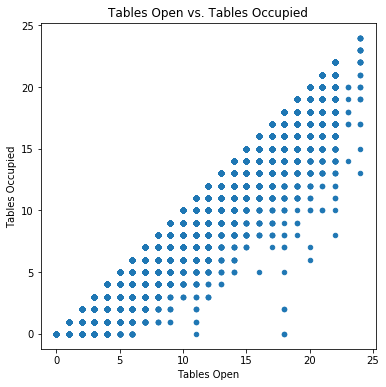

In [37]:
ax = plt.figure(figsize=(6,6)).gca()
casino.plot.scatter(x = 'TablesOpen', y = 'TablesOcc', ax = ax)
ax.set_title('Tables Open vs. Tables Occupied')
ax.set_xlabel('Tables Open')
ax.set_ylabel('Tables Occupied')

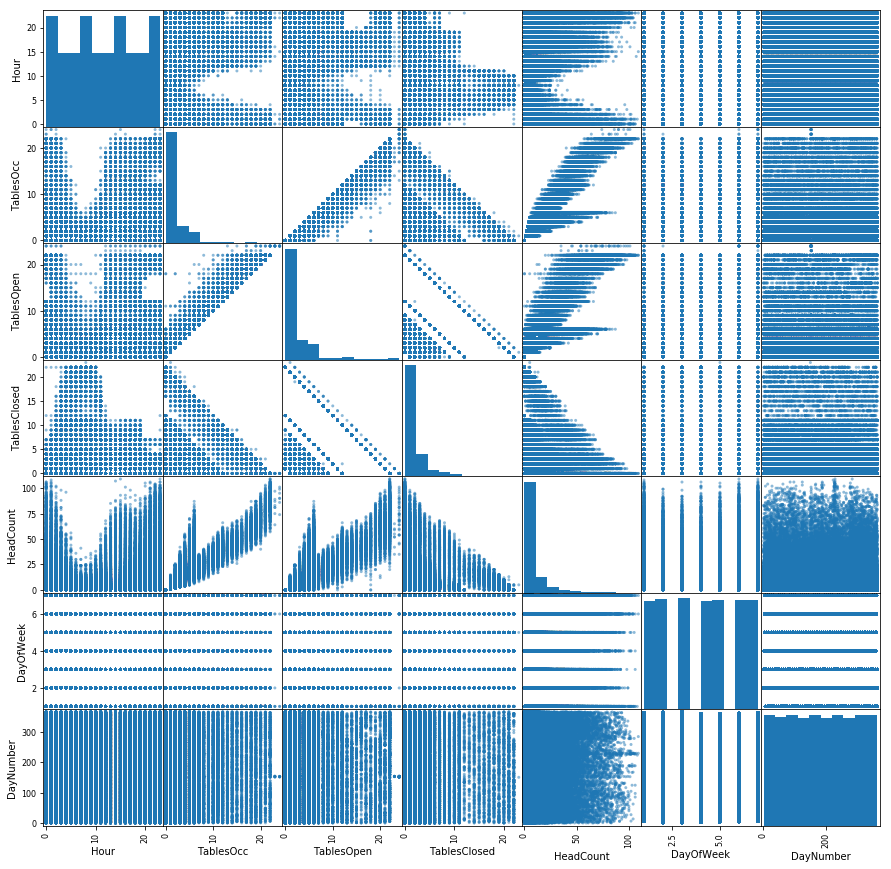

In [38]:
pd.plotting.scatter_matrix(casino, figsize=(15, 15))
plt.show()

Text(0,0.5,'Headcount')

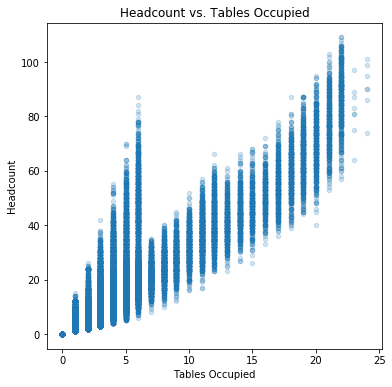

In [27]:
ax = plt.figure(figsize=(6,6)).gca()
casino.plot.scatter(x = 'TablesOcc', y = 'HeadCount', ax = ax, alpha = 0.2)
ax.set_title('Headcount vs. Tables Occupied')
ax.set_xlabel('Tables Occupied')
ax.set_ylabel('Headcount')

In [41]:
casino['counts'] = 1

Text(0,0.5,'Headcount')

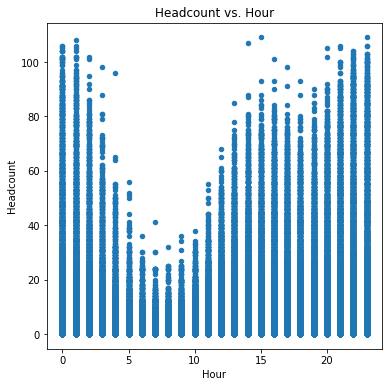

In [80]:
ax = plt.figure(figsize=(6,6)).gca()
casino.plot.scatter(x = 'Hour', y = 'HeadCount', ax = ax)
ax.set_title('Headcount vs. Hour')
ax.set_xlabel('Hour')
ax.set_ylabel('Headcount')

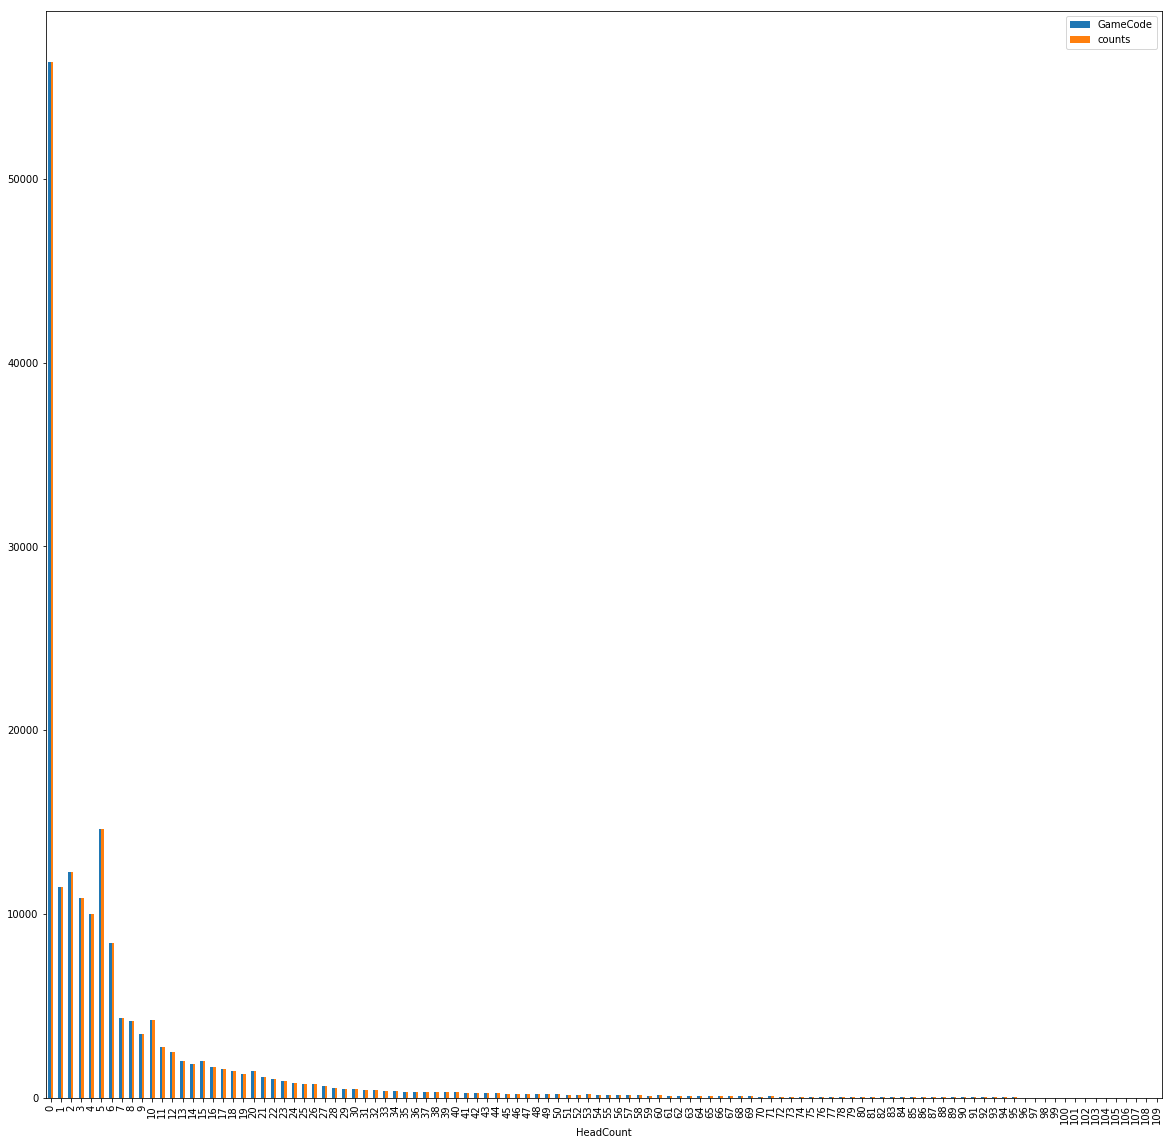

In [81]:
ax = plt.figure(figsize=(20, 20)).gca() # define axis
casino.loc[:, ['GameCode', 'counts', 'HeadCount']].groupby(['HeadCount']).agg('count').plot.bar(ax = ax)

Text(0.5,1,'Time series of sunspots')

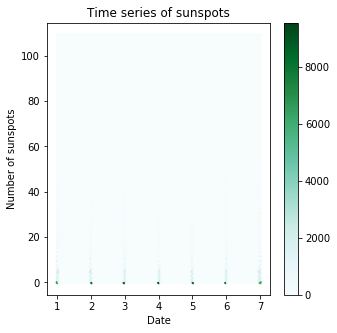

In [69]:
ax = plt.figure(figsize=(5, 5)).gca() # define axis
casino.plot.hexbin(x = 'DayOfWeek', y = 'HeadCount', ax = ax)
ax.set_xlabel('Date')
ax.set_ylabel('Number of sunspots')
ax.set_title('Time series of sunspots')

In [82]:
import seaborn as sns

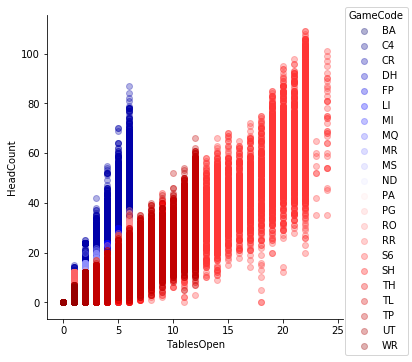

In [87]:
sns.lmplot(x = 'TablesOpen', y = 'HeadCount', 
       data = casino, 
       hue = "GameCode", 
       palette="seismic", 
       scatter_kws={'alpha':0.3},
       fit_reg = False)
# plt.xlabel('City MPG')
# plt.ylabel('Auto Price')
# plt.title('Auto Price vs. City MPG \n with fuel type by color')